![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [33]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [34]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [53]:
bikes.groupby('workingday').total.describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


#### Analisis
Analizando los datos de las horas, se puede observar que las personas compran un mayor numero de bicicletas en una franja horaria de 12 del medio día a 8 de la noche. Igualmente observando los datos de "workingday" se observa que los promedios entre día laboral y fin de semana son muy similares, a pesar de que se encuentra un mayor número de datos en día laboral, relacionado a que son 5 días a la semana, la compra de bicicletas durante estos 5 días, difiere en promedio solo en 5 bicicletas en relación con el fin de semana, lo que indica que la proporción de bicicletas por día compradas el fin de semana es bastante alta. 

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

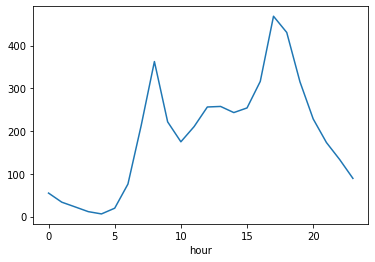

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

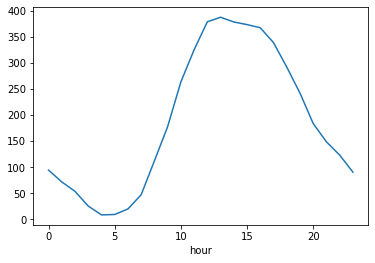

In [36]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
filtro_0 = bikes["workingday"] == 0
workingday_0 = bikes[filtro_0]

workingday_0.groupby('hour').total.mean().plot()

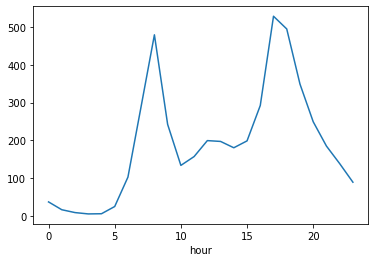

In [37]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 

filtro_1 = bikes["workingday"] == 1
workingday_1 = bikes[filtro_1]

workingday_1.groupby('hour').total.mean().plot()

#### Analisis
Se observa un comportamiento totalmente diferente entre la compra de bicicletas en días laborales y en días de fin de semana, en la segunda gráfica que representa la compra en días laborales, se observa un comportamiento relacionado con el horario laboral, puesto que se observa que los picos en los que más se compran bicicletas es antes de las 7 de la mañana y después de las 5 de la tarde. Por el contrario en la gráfica de la compra de bicicletas en días de fin de semana se observa un crecimiento constante a lo largo del día, con un punto máximo entre las 12 del medio día y las 3 de la tarde. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [10]:
# Celda 3
X = bikes[['hour','workingday']]
y = bikes['total']

Reg = LinearRegression()
Reg.fit(X,y)

print("Intercepto:", Reg.intercept_)
print("Coeficientes:", Reg.coef_)

Intercept: 67.7059502619161
Coeficientes: [10.49206282  4.07248627]


#### Analisis 
Con este modelo de regresión lineal se obtiene un intercepto de 67,7. Se observa que según el modelo de regresión lineal, por cada incremento en la variable "hora" se tiene un aumento 10,49 y por cada día laboral se tendrá un adicional de 4,07. A simple vista se puede observar que la regresión lineal no es la mejor opción para estos datos, puesto que en las gráficas anteriores se observa como la relación entre las variables predictoras y la variable de respuesta no es lineal y se acerca más a una relación cuadratica. Esto justifica el hecho de que el coeficiente de la variable "workingday" indique que se tendrá un número de ventas mayor en día laboral, siendo al contrario, puesto que los fines de semana se vende un mayor número de bicicletas por día.  

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [55]:
# Celda 4

# Importación de modelos de sklearn 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

XTotal = bikes[["hour","workingday"]]
yTotal = bikes[["total"]]

In [56]:
# Definición de parámetros y criterios de parada
max_depth = None # Maxima profundidad
num_pct = 10 # Numero de percentiles
max_features = None # Maximo numero de features
min_gain=0.001 # Ganancia mínima

In [57]:
# Impresión variable a usar (hour)
j = 0
print(XTotal.columns[j])

hour


In [58]:
# División de la variable hours en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(XTotal.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

In [42]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [43]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [44]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de corte para hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [45]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(XTotal, yTotal, 5)
j, split, gain

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

In [46]:
# Celda 5

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 40)

MSE_scores = []

for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    reg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores.append(cross_val_score(reg, XTotal, yTotal, cv=10, scoring='neg_mean_squared_error').mean()*(-1))
    

Text(0, 0.5, 'MSE')

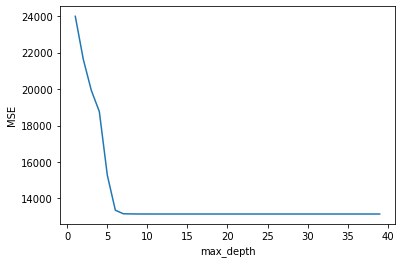

In [47]:
# Gráfica max_depth versus MSE (error del modelo)
plt.plot(max_depth_range, MSE_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [60]:
# MSE óptmimo (desempeño del modelo) y su correspondiente max_depth
#sorted(zip(MSE_scores, max_depth_range))[::-1][0]

mse_min = min(MSE_scores)
profundidad = MSE_scores.index(mse_min)
print("Con una profundidad optima de ",profundidad," se obtiene un MSE de: ",MSE_scores[profundidad])


Con una profundidad optima de  9  se obtiene un MSE de:  13143.121883295113


In [63]:
# max_depth=9 fue la mejor profundidad, se ajusta un árbol usando este valor 
reg = DecisionTreeClassifier(max_depth=profundidad, random_state=1)
reg.fit(XTotal, yTotal)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [77]:
# Impresión de resultados de desemepeño del árbol de decisión
print("El MSE para el modelo es de: ", cross_val_score(reg, XTotal, yTotal, cv=10 , scoring='neg_mean_squared_error').mean()*(-1))



El MSE para el modelo es de:  20875.44561499014


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir la cantidad de reacciones en redes sociales (popularidad) de la notica. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [48]:
# Lectura de la información de archivo .csv
df = pd.read_csv('mashable.csv', index_col=0)
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,http://mashable.com/2013/08/03/twerking-addict...,523.0,10.0,660.0,0.493884,1.0,0.633971,20.0,4.0,1.0,...,0.050000,0.50,-0.258730,-0.80,-0.100000,0.1,0.0,0.4,0.0,0
5996,http://mashable.com/2014/08/21/study-programs-...,139.0,9.0,144.0,0.647887,1.0,0.739583,15.0,4.0,10.0,...,0.100000,0.60,-0.250000,-0.30,-0.200000,0.0,0.0,0.5,0.0,1
5997,http://mashable.com/2013/04/25/email-warrant-m...,623.0,8.0,536.0,0.512287,1.0,0.647929,6.0,2.0,1.0,...,0.100000,0.40,-0.156250,-0.30,-0.100000,0.0,0.0,0.5,0.0,0
5998,http://mashable.com/2013/06/03/smartphone-sale...,584.0,10.0,266.0,0.534413,1.0,0.605882,9.0,6.0,1.0,...,0.100000,0.60,-0.250000,-0.40,-0.100000,0.0,0.0,0.5,0.0,0


In [14]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']


0.5

In [15]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [52]:
# Celda 6
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import metrics


# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 40)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf1 = DecisionTreeClassifier(max_depth=depth, random_state=42)
    accuracy_scores.append(cross_val_score(clf1, X_train, y_train, cv=10, scoring='accuracy').mean())

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clf1 = DecisionTreeClassifier(max_depth=2, random_state=1)
clf1.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)


print('El F1 score del arbol de decision es de:',round(metrics.f1_score(y_pred1, y_test),4))
print('El Accuracy del arbol de decision es de:',round(metrics.accuracy_score(y_pred1, y_test),4))

El F1 score del arbol de decision es de: 0.6449
El Accuracy del arbol de decision es de: 0.6453


In [17]:
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)


print('El F1 score para la regresion logistica es de:',round(metrics.f1_score(y_pred2, y_test),4))
print('El Accuracy para la regresion logistica es de:',round(metrics.accuracy_score(y_pred2, y_test),4))

El F1 score para la regresion logistica es de: 0.6106
El Accuracy para la regresion logistica es de: 0.614


Se observa un mayor desempeño usando el arbol de decisión con accuracy y F1score similares, de 0.64, mientras que con la regresion logistica el valor que se alcanza es de 0,61. 

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [18]:
# Celda 7
from sklearn.ensemble import BaggingClassifier

#100 árboles de decisión donde max_depth = None
clf_Bg_1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,max_samples=300,
                        random_state=42, oob_score=True)

clf_Bg_1.fit(X_train, y_train)
y_pred_Bg_1 = clf_Bg_1.predict(X_test)

f1score_1 = metrics.f1_score(y_pred_Bg_1, y_test)
Accuracy_1 =  metrics.accuracy_score(y_pred_Bg_1, y_test)

print('Los resultados  para el primer escenario son:')
print("")
print('El F1 score del primer escenario es de:',round(f1score_1,5))
print('El Accuracy del primer escenario es de:',round(Accuracy_1,5))
print("")

#100 árboles de decisión donde max_depth = 2
clf_Bg_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier( max_depth = 2), n_estimators=100, bootstrap=True,max_samples=300,
                        random_state=42, oob_score=True)

clf_Bg_2.fit(X_train, y_train)
y_pred_Bg_2 = clf_Bg_2.predict(X_test)

f1score_2 = metrics.f1_score(y_pred_Bg_2, y_test)
Accuracy_2 =  metrics.accuracy_score(y_pred_Bg_2, y_test)

print('Los resultados  para el segundo escenario son:')
print("")
print('El F1 score del segundo escenario es de:',round(f1score_2,4))
print('El Accuracy del segundo escenario es de:',round(Accuracy_2,4))
print("")

#100 regresiones logisticas 
clf_Bg_3 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,max_samples=300,
                        random_state=42, oob_score=True)
clf_Bg_3.fit(X_train, y_train)
y_pred_Bg_3 = clf_Bg_3.predict(X_test)

f1score_3 = metrics.f1_score(y_pred_Bg_3, y_test)
Accuracy_3 = metrics.accuracy_score(y_pred_Bg_3, y_test) 

print('Los resultados  para el tercer escenario son:')
print("")
print('El F1 score del segundo escenario es de:',round(f1score_3,4))
print('El Accuracy del segundo escenario es de:',round(Accuracy_3,4))

Los resultados  para el primer escenario son:

El F1 score del primer escenario es de: 0.66756
El Accuracy del primer escenario es de: 0.66867

Los resultados  para el segundo escenario son:

El F1 score del segundo escenario es de: 0.6335
El Accuracy del segundo escenario es de: 0.646

Los resultados  para el tercer escenario son:

El F1 score del segundo escenario es de: 0.6125
El Accuracy del segundo escenario es de: 0.6187


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [24]:
# Celda 8

#100 árboles de decisión donde max_depth = None
clf_Bg_4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,max_samples=300,
                        random_state=42, oob_score=True)

clf_Bg_4.fit(X_train, y_train)
y_pred_Bg_4 = clf_Bg_4.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors4 = np.zeros(clf_Bg_4.n_estimators)
y_pred_all_4 = np.zeros((X_test.shape[0], clf_Bg_4.n_estimators))

for i in range(clf_Bg_4.n_estimators):
    oob_sample = ~clf_Bg_4.estimators_samples_[i]
    y_pred_4 = clf_Bg_4.estimators_[i].predict(X_train.values[oob_sample])
    errors4[i] = metrics.accuracy_score(y_pred_4, y_train.values[oob_sample])
    y_pred_all_4[:, i] = clf_Bg_4.estimators_[i].predict(X_test)
    
alpha4 = (1 - errors4) / (1 - errors4).sum()
y_pred4 = (np.sum(y_pred_all_4 * alpha4, axis=1) >= 0.5).astype(np.int)

f1score_4 = metrics.f1_score(y_pred4, y_test)
Accuracy_4 =  metrics.accuracy_score(y_pred4, y_test)

print('Los resultados  para el primer escenario son:')
print("")
print('El F1 score del primer escenario es de:',round(f1score_4,5))
print('El Accuracy del primer escenario es de:',Accuracy_4)
print("")

#100 árboles de decisión donde max_depth = 2
clf_Bg_5 = BaggingClassifier(base_estimator=DecisionTreeClassifier( max_depth = 2), n_estimators=100, bootstrap=True,max_samples=300,
                        random_state=42, oob_score=True)

clf_Bg_5.fit(X_train, y_train)
y_pred_Bg_5 = clf_Bg_5.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors5 = np.zeros(clf_Bg_5.n_estimators)
y_pred_all_5 = np.zeros((X_test.shape[0], clf_Bg_5.n_estimators))

for i in range(clf_Bg_5.n_estimators):
    oob_sample = ~clf_Bg_4.estimators_samples_[i]
    y_pred_5 = clf_Bg_5.estimators_[i].predict(X_train.values[oob_sample])
    errors5[i] = metrics.accuracy_score(y_pred_5, y_train.values[oob_sample])
    y_pred_all_5[:, i] = clf_Bg_5.estimators_[i].predict(X_test)
    
alpha5 = (1 - errors5) / (1 - errors5).sum()
y_pred5 = (np.sum(y_pred_all_5 * alpha5, axis=1) >= 0.5).astype(np.int)

f1score_5 = metrics.f1_score(y_pred5, y_test)
Accuracy_5 =  metrics.accuracy_score(y_pred5, y_test)

print('Los resultados  para el segundo escenario son:')
print("")
print('El F1 score del segundo escenario es de:',round(f1score_5,4))
print('El Accuracy del segundo escenario es de:',round(Accuracy_5,4))
print("")

#100 regresiones logisticas 
clf_Bg_6 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,max_samples=300,
                        random_state=42, oob_score=True)
clf_Bg_6.fit(X_train, y_train)
y_pred_Bg_6 = clf_Bg_6.predict(X_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors6 = np.zeros(clf_Bg_6.n_estimators)
y_pred_all_6 = np.zeros((X_test.shape[0], clf_Bg_6.n_estimators))

for i in range(clf_Bg_6.n_estimators):
    oob_sample = ~clf_Bg_6.estimators_samples_[i]
    y_pred_6 = clf_Bg_6.estimators_[i].predict(X_train.values[oob_sample])
    errors6[i] = metrics.accuracy_score(y_pred_6, y_train.values[oob_sample])
    y_pred_all_6[:, i] = clf_Bg_6.estimators_[i].predict(X_test)
    
alpha6 = (1 - errors6) / (1 - errors6).sum()
y_pred6 = (np.sum(y_pred_all_6 * alpha6, axis=1) >= 0.5).astype(np.int)

f1score_6 = metrics.f1_score(y_pred6, y_test)
Accuracy_6 =  metrics.accuracy_score(y_pred6, y_test)

print('Los resultados  para el tercer escenario son:')
print("")
print('El F1 score del tercer escenario es de:',round(f1score_6,4))
print('El Accuracy del tercer escenario es de:',round(Accuracy_6,4))
print("")

Los resultados  para el primer escenario son:

El F1 score del primer escenario es de: 0.67153
El Accuracy del primer escenario es de: 0.67

Los resultados  para el segundo escenario son:

El F1 score del segundo escenario es de: 0.6347
El Accuracy del segundo escenario es de: 0.6493

Los resultados  para el tercer escenario son:

El F1 score del tercer escenario es de: 0.6162
El Accuracy del tercer escenario es de: 0.6213



### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [29]:
# Celda 9
modelos = ['v_mayoritaria_1','v_mayoritaria_2','v_mayoritaria_3','v_ponderada_1','v_ponderada_2','v_ponderada_3']
f1score = [round(f1score_1,3),round(f1score_2,3),round(f1score_3,3),round(f1score_4,3),round(f1score_5,3),round(f1score_6,3)]
Accuracy = [round(Accuracy_1,3),round(Accuracy_2,3),round(Accuracy_3,3),round(Accuracy_4,3),round(Accuracy_5,3),round(Accuracy_6,3)]

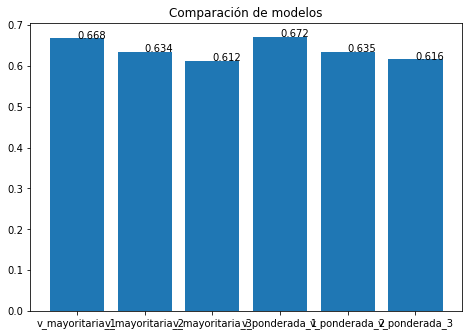

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ax.bar(modelos,f1score)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(modelos,f1score,plt)
plt.show()

Al realizar votacion ponderada se observa una mejora significativa en el desempeno de los tres modelos utilizados. Al igual que con la votacion mayoritaria se obtiene un mejor desempeno con el primer escenario en el que se utilizan 100 Arboles de decision sin restriccion por profundidad, se observa que al restringir la profundidad a 2 se tiene una reduccion significativa en el desempeno. En los dos tipos de votacion se tiene el peor desempeno al utilizar la regresion logistica.   